In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json
from glob import glob

In [17]:
llama3_crosslayerkv = glob('llama3_64_crosslayerkv-*.data')
llama3_crosslayerkv = sorted(llama3_crosslayerkv, key = lambda x: int(x.split('-')[-1].replace('.data', '')))
llama3 = glob('llama3_64m-*.data')
llama3 = sorted(llama3, key = lambda x: int(x.split('-')[-1].replace('.data', '')))

In [18]:
llama3_memory, llama3_crosslayerkv_memory = [], []
for f in llama3:
    with open(f) as fopen:
        d = json.load(fopen)
        llama3_memory.append(d['memory use'])
        
for f in llama3_crosslayerkv:
    with open(f) as fopen:
        d = json.load(fopen)
        llama3_crosslayerkv_memory.append(d['memory use'])

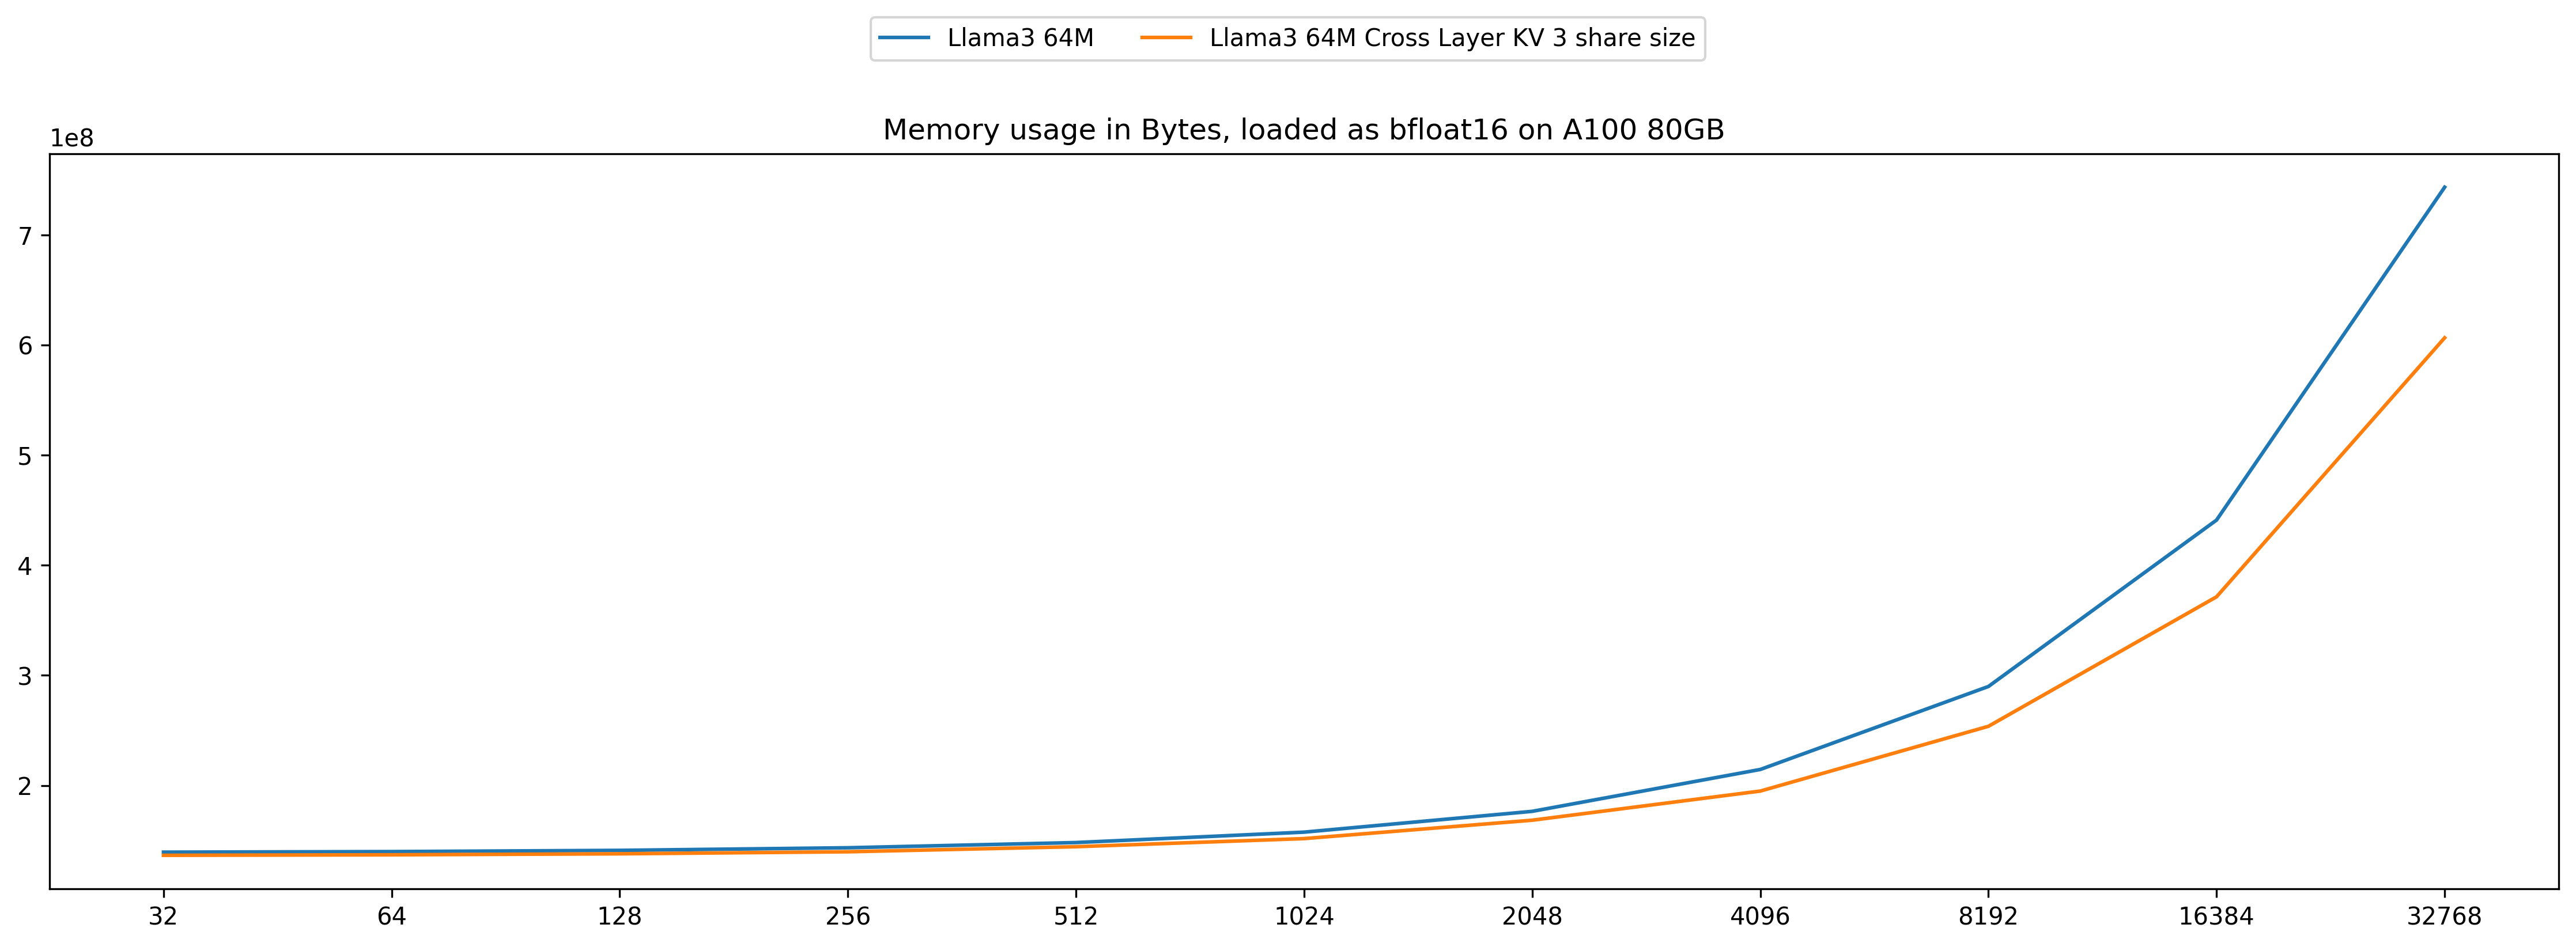

In [20]:
lengths = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

fig, ax1 = plt.subplots(1, 1, figsize=(15, 5), dpi = 300)
ax1.plot(llama3_memory, label = 'Llama3 64M')
ax1.plot(llama3_crosslayerkv_memory, label = 'Llama3 64M Cross Layer KV 3 share size')
ax1.set_xticks(np.arange(len(lengths)))
ax1.set_xticklabels(lengths)
handles, labels = ax1.get_legend_handles_labels()
ax1.set_title('Memory usage in Bytes, loaded as bfloat16 on A100 80GB')
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

fig.tight_layout()
plt.show()

In [21]:
llama3_speed, llama3_crosslayerkv_speed = [], []
for f in llama3:
    with open(f) as fopen:
        d = json.load(fopen)
        llama3_speed.append(d['time taken'])
        
for f in llama3_crosslayerkv:
    with open(f) as fopen:
        d = json.load(fopen)
        llama3_crosslayerkv_speed.append(d['time taken'])

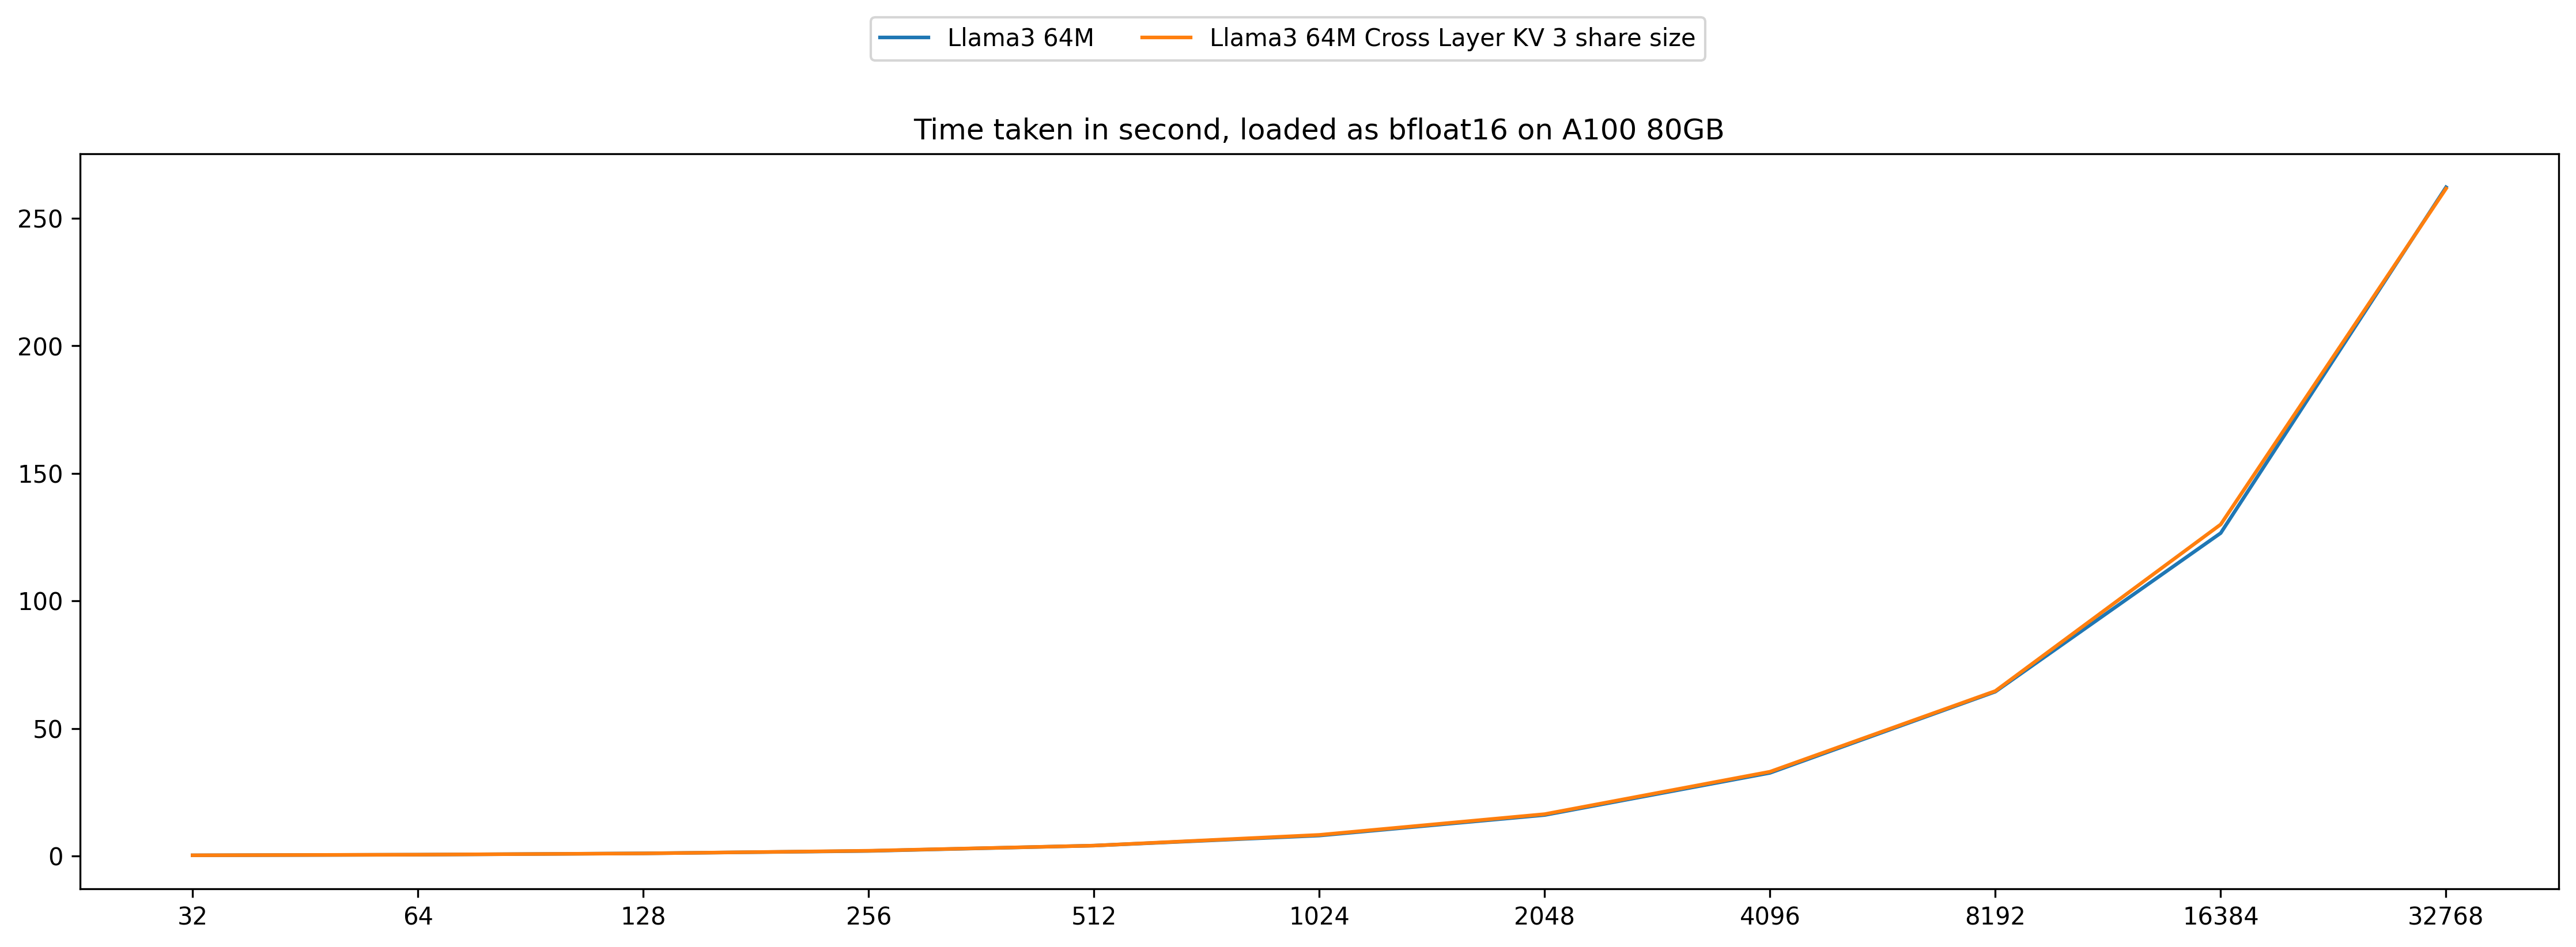

In [23]:
lengths = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

fig, ax1 = plt.subplots(1, 1, figsize=(15, 5), dpi = 300)
ax1.plot(llama3_speed, label = 'Llama3 64M')
ax1.plot(llama3_crosslayerkv_speed, label = 'Llama3 64M Cross Layer KV 3 share size')
ax1.set_xticks(np.arange(len(lengths)))
ax1.set_xticklabels(lengths)
handles, labels = ax1.get_legend_handles_labels()
ax1.set_title('Time taken in second, loaded as bfloat16 on A100 80GB')
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

fig.tight_layout()
plt.show()